# Nearest Neighbor per il riconoscimento di cifre scritte a mano

In questo quaderno costruiremo un classificatore che riceve un'immagine di una cifra scritta a mano e restituisce un'etichetta da 0 a 9. Consideremo una strategia particolarmente semplice per questo problema, il **classificatore nearest neighbor**. 

## 1. Il dataset MNIST

`MNIST` è un dataset classico del machine learning, consistente di immagini 28 x 28 in scala di grigi di cifre scritte a mano. Il training set originale consiste di 60,000 esempi e il test set di 10,000 esempi. In questo quaderno lavoreremo con un sottoinsieme di questi dati: un training set di 7,500 esempi ed un test set di 1,000 esempi. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

## Carica il training set
train_data = np.load('data/MNIST/train_data.npy')
train_labels = np.load('data/MNIST/train_labels.npy')

## Carica il test set
test_data = np.load('data/MNIST/test_data.npy')
test_labels = np.load('data/MNIST/test_labels.npy')

In [2]:
## Stampa le loro dimensioni
print("Dimensioni del training set: ", np.shape(train_data))
print("Numero di etichette di training: ", len(train_labels))
print("Dimensioni del test set: ", np.shape(test_data))
print("Numero di etichette di test: ", len(test_labels))

Dimensioni del training set:  (7500, 784)
Numero di etichette di training:  7500
Dimensioni del test set:  (1000, 784)
Numero di etichette di test:  1000


In [3]:
## Calcola il numero di esempi relativi a ciascuna cifra (0--9)
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Distribuzione del training set:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Distribuzione del test set:")
print(dict(zip(test_digits, test_counts)))

Distribuzione del training set:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Distribuzione del test set:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


## 2. Visualizzazione dei dati
Ogni osservazione (ogni esempio) è memorizzata come vettore a 784 dimensioni. Per visualizzare un'osservazione, prima la riformattiamo come immagine 28x28. 

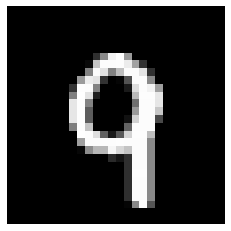

Label: 9


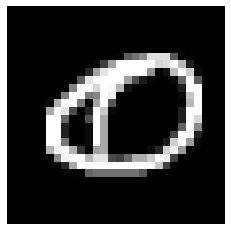

Label: 0


In [4]:
## Definisco una funzione che mostra l'immagine di una cifra data la sua rappresentazione vettoriale
def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Definisco una funzione che prende un indice relativo a un particolare dataset ("train" o "test") 
## e mostra quella immagine.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,])
        label = train_labels[index]
    else:
        show_digit(test_data[index,])
        label = test_labels[index]
    print("Label: " + str(label))
    return

## Visualizza la prima osservazione del training set
vis_image(0, "train")

## Visualizza la prima osservazione del test set
vis_image(0, "test")

## 3. Calcolo della distanza euclidea

Per calcolare i nearest neighbor nel nostro dataset, dobbiamo prima poter calcolare le distanze tra osservazioni. Una naturale funzione di distanza è la *distanza euclidea*: per due vettori $x, y \in \mathbb{R}^d$, la loro distanza euclidea è definita come
$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$
Spesso omettiamo la radice quadrata, e calcoliamo semplicemente la *distanza euclidea al quadrato*: 
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$
Dal punto di vista del calcolo dei nearest neighbor, le due misure sono equivalenti: dati tre vettori $x, y, z \in \mathbb{R}^d$, abbiamo $\|x - y\| \leq \|x - z\|$ se e solo se $\|x - y\|^2 \leq \|x - z\|^2$.

Ora vogliamo essere in grado di calcolare la distanza euclidea al quadrato. Definiamo una funzione a questo scopo. 

In [5]:
## Calcola il quadrato della distanza euclidea tra due vettori
def squared_dist(x,y):
    return np.sum(np.square(x-y))

## Calcola la distanza tra un sette ed un uno del nostro training set
print("Distanza da 7 a 6: ", squared_dist(train_data[4,],train_data[5,]))

## Calcola la distanza tra un sette ed un due del nostro training set
print("Distanza da 7 a 2: ", squared_dist(train_data[4,],train_data[1,]))

## Calcola la distanza tra due sette del nostro training set
print("Distance da 7 a 7: ", squared_dist(train_data[4,],train_data[7,]))

Distanza da 7 a 6:  5357193.0
Distanza da 7 a 2:  12451684.0
Distance da 7 a 7:  5223403.0


## 4. Calcolo del nearest neighbor

Ora che abbiamo una funzione distanza, possiamo occuparci della classificazione nearest neighbor. 

In [6]:
## Dato un vettore x, restituisce l'indice del suo nearest neighbor in train_data
def find_NN(x):
    # Calcola le distanze da x ad ogni altra riga in train_data
    distances = [squared_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Recupera l'indice corrispondente alla distanza minima
    return np.argmin(distances)

## Dato un vettore x, restituisce l'etichetta del suo nearest neighbor in train_data
def NN_classifier(x):
    # Recupera l'indice del nearest neighbor di x
    index = find_NN(x)
    # Restituisci la sua etichetta
    return train_labels[index]

Classificazione NN:  0
Vera etichetta:  0
Immagine di test:


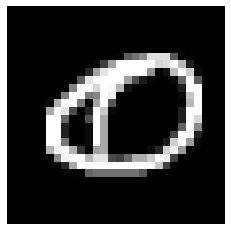

Label: 0
Immagine nearest neighbor corrispondente:


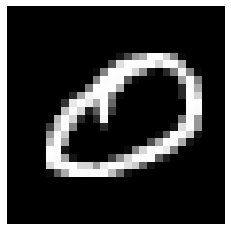

Label: 0


In [7]:
## Un caso di classificazione corretta:
print("Classificazione NN: ", NN_classifier(test_data[0,]))
print("Vera etichetta: ", test_labels[0])
print("Immagine di test:")
vis_image(0, "test")
print("Immagine nearest neighbor corrispondente:")
vis_image(find_NN(test_data[0,]), "train")

Classificazione NN:  2
Vera etichetta:  3
Immagine di test:


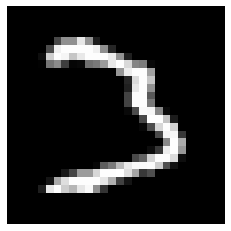

Label: 3
Corrispondente immagine nearest neighbor:


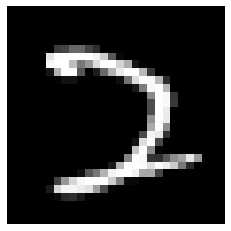

Label: 2


In [8]:
## Un caso di classificazione scorretta: 
print("Classificazione NN: ", NN_classifier(test_data[39,]))
print("Vera etichetta: ", test_labels[39])
print("Immagine di test:")
vis_image(39, "test")
print("Corrispondente immagine nearest neighbor:")
vis_image(find_NN(test_data[39,]), "train")

## 5. Esercizio 1
I due esempi sopra mostrano i risultati della classificazione NN sulle osservazioni di test numero 0 e 39. 

Ora provate l'osservazione di test numero 100. 
* Qual è l'indice del suo nearest neighbor nel training set? 
* Visualizzate sia l'osservazione di test che il suo nearest neighbor.
* Quale etichetta è stata predetta? Si tratta dell'etichetta corretta? 

## 6. Elaborazione del test set completo

Ora applichiamo il nostro classificatore nearest neighbor all'intero data set di test. 

Osserviamo che per classificare ognuna delle 1,000 osservazioni di test, il nostro codice effettua un'intera passata su ciascuno dei 7,500 esempi di training. Quindi non possiamo aspettarci che l'elaborazione sia molto rapida. Il codice seguente impiega circa 100-150 secondi su un processore Intel Core i5 a 2.6 GHz. 

In [10]:
# Questa cella richiede circa 2-3 minuti
## Effettua la predizione di ciascun esempio di test (e cronometra il tempo richiesto)
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(len(test_labels))]
t_after = time.time()

## Calcola il tasso di errore
err_positions = np.not_equal(test_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Errore del classificatore nearest neighbor: ", error)
print("Tempo di classificazione (secondi): ", t_after - t_before)

Errore del classificatore nearest neighbor:  0.046
Tempo di classificazione (secondi):  51.60781812667847


## 7. Metodi nearest neighbor più rapidi

Effettuare la classificazione nearest neighbor nel modo presentato richiede un'intera passata sul training set per classificare una singola osservazione. Se ci sono $m$ esempi di training in $\mathbb{R}^d$, questo richiede tempo proporzionale a $m d$ *per ogni predizione*. 

Fortunatamente, esistono metodi più rapidi per effettuare la classificazione nearest neighbor se siamo disposti a spendere del tempo per *preprocessare* il training set. 
`scikit-learn` offre implementazioni di due utili strutture dati nearest neighbor: il _ball tree_ e il _k-d tree_. 

In [11]:
# Questa cella richiede circa 8 secondi
from sklearn.neighbors import BallTree

## Costruisci una struttura nearest neighbor sui dati di training
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

## Calcola e visualizza il tempo di training
t_training = t_after - t_before
print("Tempo di preprocessamento (secondi): ", t_training)

## Effettua la predizione di ciascun esempio di test (e cronometra il tempo richiesto)
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Calcola e visualizza il tempo di test
t_testing = t_after - t_before
print("Tempo per classificare il test set (secondi): ", t_testing)

## Verifica che le predizioni siano le stesse dell'algoritmo NN originale
print("Il ball tree produce le stesse predizioni di cui sopra? ", np.array_equal(test_predictions, ball_tree_predictions))

Tempo di preprocessamento (secondi):  0.838860273361206
Tempo per classificare il test set (secondi):  6.170664072036743
Il ball tree produce le stesse predizioni di cui sopra?  True


In [12]:
# Questa cella richiede circa 10 secondi
from sklearn.neighbors import KDTree

## Costruisci una struttura nearest neighbor sui dati di training
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Calcola e visualizza il tempo di training
t_training = t_after - t_before
print("Tempo di preprocessamento (secondi): ", t_training)

## Effettua la predizione di ciascun esempio di test (e cronometra il tempo richiesto)
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Calcola e visualizza il tempo di test
t_testing = t_after - t_before
print("Tempo per classificare il test set (secondi): ", t_testing)

## Verifica che le predizioni siano le stesse dell'algoritmo NN originale
print("Il KD tree produce le stesse predizioni di cui sopra? ", np.array_equal(test_predictions, kd_tree_predictions))

Tempo di preprocessamento (secondi):  1.3294177055358887
Tempo per classificare il test set (secondi):  7.602702379226685
Il KD tree produce le stesse predizioni di cui sopra?  True


## 8. Apprendimento su tutti i 60,000 esempi di training
Possiamo migliorare l'errore del nostro classificatore fornendogli più esempi? 
Proviamo ad utilizzare l'intero training set MNIST, di 60,000 esempi. (Continueremo ad utilizzare solo 1,000 esempi di test, per praticità.)

Poiché il dataset intero è in un formato diverso, definiamo prima le funzioni di caricamento appropriate. 

In [13]:
import os, gzip
from urllib.request import urlretrieve
data_dir = 'data/MNIST/' # directory in cui si trovano o si troveranno i file dati

# Funzione per scaricare uno specifico file dati MNIST dal sito web di Yann Le Cun
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, data_dir + filename)

# Chiama download() se necessario, poi legge le immagini
def load_mnist_images(filename):
    if not os.path.exists(data_dir + filename):
        download(filename)
    with gzip.open(data_dir + filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1,784) # carichiamo le immagini come vettori 784-dimensionali
    return data

def load_mnist_labels(filename):
    if not os.path.exists(data_dir + filename):
        download(filename)
    with gzip.open(data_dir + filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

Ora possiamo caricare il dataset completo, di 60,000 esempi. 

In [14]:
## Carichiamo il training set completo (NB. richiede una connessione Internet attiva se i file non sono già presenti)
train_data = load_mnist_images('train-images-idx3-ubyte.gz')
train_labels = load_mnist_labels('train-labels-idx1-ubyte.gz')
print(train_data.shape)

(60000, 784)


Costruire la predizione di 1,000 esempi di test con Nearest Neighbor richiederebbe un tempo enorme, dovendo confrontare ciascuno di essi con 60,000 esempi memorizzati, quindi sfruttiamo una struttura dati `KDTree` per ottenere predizioni identiche ma più rapide. 

In [15]:
# Questa cella richiede circa 50 secondi
## Costruisci una struttura nearest neighbor sui dati di training
t_before = time.time()
kd_tree = KDTree(train_data)
t_after = time.time()

## Calcola e visualizza il tempo di training
t_training = t_after - t_before
print("Tempo di preprocessamento (secondi): ", t_training)

Tempo di preprocessamento (secondi):  25.894065856933594


In [16]:
# Questa cella richiede circa 75 secondi
# Effettua la predizione di ciascun esempio di test (e cronometra il tempo richiesto)
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
kd_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Calcola e visualizza il tempo di test
t_testing = t_after - t_before
print("Tempo per classificare il test set (secondi): ", t_testing)

## Calcola il tasso di errore
err_positions = np.not_equal(kd_tree_predictions, test_labels)
error = float(np.sum(err_positions))/len(test_labels)

print("Errore del classificatore nearest neighbor: ", error)

Tempo per classificare il test set (secondi):  61.179027795791626
Errore del classificatore nearest neighbor:  0.029


L'errore del classificatore è sceso dal 4.6% a circa il 3%, solo aumentando il numero di esempi di training! 